# Analysing Annotation Agreement

ann1 - Jing
ann2 - jdnascim
ann3 - phillipe

In [85]:
import json
import pandas as pd
from PIL import Image
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
annotations = pd.read_json('../annotations/5k_annotated_data_all_users.json').drop(columns=['_id'])

In [15]:
annotations['userID'] = annotations.userID.replace('Jing', 'ann1')
annotations['userID'] = annotations.userID.replace('jdnascim', 'ann2')
annotations['userID'] = annotations.userID.replace('phillipe', 'ann3')

In [22]:
annotations[annotations['userID'] == 'ann1']['work_time'].describe()

count     5000.000000
mean       267.135435
std       3377.747234
min          4.795144
25%         42.967136
50%         56.484021
75%         81.008057
max      90602.639892
Name: work_time, dtype: float64

In [24]:
annotations[annotations['userID'] == 'ann2']['work_time'].describe()

count      5000.000000
mean        833.987092
std       13729.936024
min           0.022004
25%          10.237329
50%          19.091257
75%          39.506314
max      434036.747879
Name: work_time, dtype: float64

In [25]:
annotations[annotations['userID'] == 'ann3']['work_time'].describe()

count     5000.000000
mean        64.198681
std        515.243920
min          0.024405
25%         15.176248
50%         19.406553
75%         26.541686
max      10510.901706
Name: work_time, dtype: float64

In [163]:
annotations.to_pickle('../annotations/annotators-results.pkl')

# Check Agreement

In [43]:
annotations['img_annotation'].unique()

array(['Irrelevant', 'Relevant (Related)', 'Relevant (Informative)',
       'Not sure'], dtype=object)

In [29]:
tweets = annotations[annotations['tweet_id'] == 1437188092683751424]

In [42]:
list(tweets['img_annotation'].unique())

['Irrelevant']

In [157]:
def agreement_modality(tweet_id):
    
    # get tweets with tweet_id
    tweets = annotations[annotations['tweet_id'] == tweet_id]
    
    
    img, txt = True, True
    if len(tweets['img_annotation'].unique()) > 2 :
        img = False
    if len(tweets['text_annotation'].unique()) > 2 :
        txt = False
    return img, txt

In [158]:
agreement_df = pd.DataFrame()
for index, tweet_id in enumerate(annotations['tweet_id'].unique()):
    
    agreement_df.loc[index,'tweet_id'] = tweet_id
    agreement_df.loc[index,'img'], agreement_df.loc[index,'txt'] =  agreement_modality(tweet_id)

<AxesSubplot:xlabel='img,txt'>

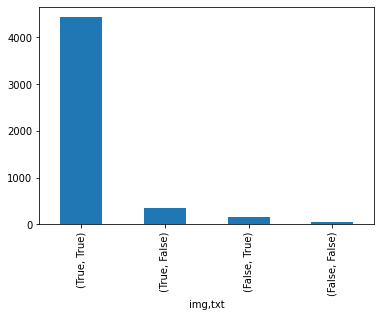

In [159]:
agreement_df[['img', 'txt']].value_counts().plot(kind='bar')

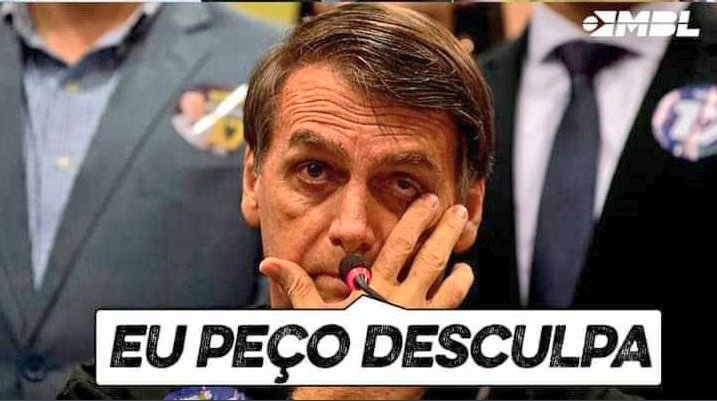

In [112]:
# Cases that annotators do not Agree
data = pd.read_pickle('../annotations/5k-data.pkl')

tweets = agreement_df[ agreement_df['img'] == False].sample()
s = data[ data['tweet_id'] == tweets['tweet_id'].values[0]].iloc[0]['img']
Image.open(f'../annotations/{s}')

In [166]:
def binary_annotation(tweet_id, modality):
    
    annot = list(annotations[annotations['tweet_id'] == tweet_id][modality])
    annot_2_class = []
    for a in annot:
        if 'Relevant ' in a:
            annot_2_class.append(True)
        elif 'Irrelevant' in a:
            annot_2_class.append(False)

    if sum(annot_2_class) >= ceil(len(annot_2_class)/2):
        return True
    return False
    

In [167]:
agreement_df = pd.DataFrame()
for index, tweet_id in enumerate(annotations['tweet_id'].unique()):
    
    agreement_df.loc[index,'tweet_id'] = tweet_id
    agreement_df.loc[index,'img'], agreement_df.loc[index,'txt'] = binary_annotation(tweet_id, 'img_annotation'), binary_annotation(tweet_id, 'text_annotation')

In [168]:
agreement_df.iloc[0]

tweet_id    1437188092683751424.0
img                         False
txt                         False
Name: 0, dtype: object

<AxesSubplot:xlabel='img,txt'>

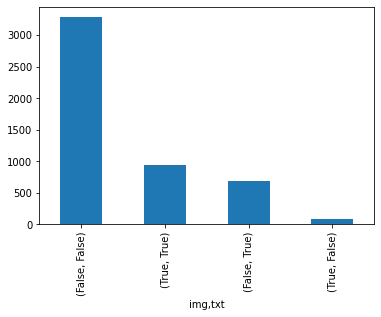

In [169]:
agreement_df[['img', 'txt']].value_counts().plot(kind='bar')

In [170]:
# If any of the modalities is true, then the whole tweet will be considered as relevant
agreement_df.to_pickle('../annotations/binary_annotation.pkl')